# Entrelaçando Desenvolvimento Humano e Características Maternas: Uma Análise Abrangente das Dinâmicas Regionais e Geográficas

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [54]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [55]:
# 1. Criando faixas de Latitude e aplicando groupby

# Defina as faixas de latitude
latitude_bins = [-90, -10.5, 90]

# Criando uma coluna 'Faixa de Latitude' com base nas faixas definidas
sinasc_raw['Faixa de Latitude'] = pd.cut(sinasc_raw['munResLat'], bins=latitude_bins, labels=['Abaixo de -10.5', 'Acima de -10.5'])

# 2. Aplicando groupby e operações estatísticas

# Escolhendo variáveis numéricas ainda não utilizadas
variavel1 = 'IDADEMAE'
variavel2 = 'QTDFILVIVO'

# Definindo as operações
operacoes = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']

# Criando um dicionário
resultados = {}

# Criando função for
for operacao in operacoes:

    # Aplique o groupby e a operação estatística para cada variável
    resultado_var1 = sinasc_raw.groupby('Faixa de Latitude')[variavel1].agg(operacao)
    resultado_var2 = sinasc_raw.groupby('Faixa de Latitude')[variavel2].agg(operacao)

    # Armazene os resultados no dicionário
    resultados[f'{variavel1}_{operacao}'] = resultado_var1
    resultados[f'{variavel2}_{operacao}'] = resultado_var2

# 3. Exibindo os resultados

resultados_df = pd.DataFrame(resultados)
print(resultados_df)

                   IDADEMAE_sum  QTDFILVIVO_sum  IDADEMAE_mean  \
Faixa de Latitude                                                
Abaixo de -10.5          340143         12600.0      26.178943   
Acima de -10.5           365094         14226.0      26.014964   

                   QTDFILVIVO_mean  IDADEMAE_min  QTDFILVIVO_min  \
Faixa de Latitude                                                  
Abaixo de -10.5           0.980011            12             0.0   
Acima de -10.5            1.129317            11             0.0   

                   IDADEMAE_max  QTDFILVIVO_max  IDADEMAE_median  \
Faixa de Latitude                                                  
Abaixo de -10.5              53            30.0             26.0   
Acima de -10.5               52            12.0             25.0   

                   QTDFILVIVO_median  IDADEMAE_std  QTDFILVIVO_std  \
Faixa de Latitude                                                    
Abaixo de -10.5                  1.0      6.32038

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [56]:
# 1. Criando faixas da Área dos Municípios e aplicando groupby

# Defina as faixas de área
area_bins = [-np.inf, 3000, np.inf]

# Crie uma coluna 'Faixa de Área' com base nas faixas definidas
sinasc_raw['Faixa de Área'] = pd.cut(sinasc_raw['munResArea'], bins=area_bins, labels=['Abaixo de 3000', 'Acima de 3000'])

# 2. Aplicando groupby e operações estatísticas

# Escolhendo variáveis
variavel1 = 'QTDFILVIVO'
variavel2 = 'ESCMAE'

# Converte valores não numéricos para NaN
sinasc_raw[variavel2] = pd.to_numeric(sinasc_raw[variavel2], errors='coerce')

# Definindo as operações
operacoes = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']

# Criando um dicionário
resultados = {}

# Criando função for

for operacao in operacoes:
    # Aplique o groupby e a operação estatística para cada variável
    resultado_var1 = sinasc_raw.groupby('Faixa de Área')[variavel1].agg(operacao)
    resultado_var2 = sinasc_raw.groupby('Faixa de Área')[variavel2].agg(operacao)

    # Armazene os resultados no dicionário
    resultados[f'{variavel1}_{operacao}'] = resultado_var1
    resultados[f'{variavel2}_{operacao}'] = resultado_var2

# 3. Exibindo os resultados
# Converta o dicionário de resultados em um DataFrame para facilitar a visualização
resultados_df = pd.DataFrame(resultados)

# Exiba o DataFrame com os resultados
print(resultados_df)


                QTDFILVIVO_sum  ESCMAE_sum  QTDFILVIVO_mean  ESCMAE_mean  \
Faixa de Área                                                              
Abaixo de 3000          4773.0         0.0         0.924284          NaN   
Acima de 3000          22053.0         0.0         1.086890          NaN   

                QTDFILVIVO_min  ESCMAE_min  QTDFILVIVO_max  ESCMAE_max  \
Faixa de Área                                                            
Abaixo de 3000             0.0         NaN            30.0         NaN   
Acima de 3000              0.0         NaN            14.0         NaN   

                QTDFILVIVO_median  ESCMAE_median  QTDFILVIVO_std  ESCMAE_std  \
Faixa de Área                                                                  
Abaixo de 3000                1.0            NaN        1.075442         NaN   
Acima de 3000                 1.0            NaN        1.191750         NaN   

                QTDFILVIVO_var  ESCMAE_var  
Faixa de Área                   

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [57]:
altitude_bins = [-np.inf, 500, 1000, 1500, 2000, np.inf]

# Crie uma coluna 'Faixa de Altitude' com base nas faixas definidas
sinasc_raw['Faixa de Altitude'] = pd.cut(sinasc_raw['munResAlt'], bins=altitude_bins, labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001+'])

# 2. Aplicando groupby e operações estatísticas
# Escolha as variáveis numéricas: Índice de Apgar no 1º minuto (APGAR1) e Peso do recém-nascido (PESO)
variavel1 = 'APGAR1'
variavel2 = 'PESO'

# Definindo as operações
operacoes = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']

# Crie um dicionário para armazenar os resultados
resultados = {}

# Itere sobre as operações estatísticas e aplique o groupby
for operacao in operacoes:
    # Aplique o groupby e a operação estatística para cada variável
    resultado_var1 = sinasc_raw.groupby('Faixa de Altitude')[variavel1].agg(operacao)
    resultado_var2 = sinasc_raw.groupby('Faixa de Altitude')[variavel2].agg(operacao)

    # Armazene os resultados no dicionário
    resultados[f'{variavel1}_{operacao}'] = resultado_var1
    resultados[f'{variavel2}_{operacao}'] = resultado_var2

# 3. Exibindo os resultados
# Converta o dicionário de resultados em um DataFrame para facilitar a visualização
resultados_df = pd.DataFrame(resultados)

# Exiba o DataFrame com os resultados
print(resultados_df)


                   APGAR1_sum  PESO_sum  APGAR1_mean    PESO_mean  APGAR1_min  \
Faixa de Altitude                                                               
0-500                206091.0  82517644     8.131105  3244.000629         0.0   
501-1000              13058.0   5136098     8.238486  3230.250314         0.0   
1001-1500                 0.0         0          NaN          NaN         NaN   
1501-2000                 0.0         0          NaN          NaN         NaN   
2001+                     0.0         0          NaN          NaN         NaN   

                   PESO_min  APGAR1_max  PESO_max  APGAR1_median  PESO_median  \
Faixa de Altitude                                                               
0-500                 258.0        10.0    5985.0            8.0       3270.0   
501-1000              425.0        10.0    4920.0            8.0       3272.0   
1001-1500               NaN         NaN       NaN            NaN          NaN   
1501-2000               NaN

# 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [58]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [59]:
sinasc_2 = sinasc_raw[['ESCMAE', 'IDADEMAE', 'IDADEPAI','munResNome']]
sinasc_2.head()

,ESCMAE,IDADEMAE,IDADEPAI,munResNome
0,8 a 11 anos,19,26.0,Alta Floresta D'Oeste
1,8 a 11 anos,29,24.0,Alta Floresta D'Oeste
2,8 a 11 anos,37,32.0,Alta Floresta D'Oeste
3,12 anos ou mais,30,24.0,Alto Alegre dos Parecis
4,8 a 11 anos,30,27.0,Alta Floresta D'Oeste


# 3. Mapping <a name="map"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [60]:
sinasc_3 = sinasc_2.set_index('ESCMAE')
mapping = {
    'Nenhuma': 'A - Nenhuma',
    '8 a 11 anos': 'D - 8 a 11 anos',
    '1 a 3 anos': 'B - 1 a 3 anos',
    '12 anos ou mais': 'E - 12 anos ou mais',
    '4 a 7 anos': 'C - 4 a 7 anos'
}
sinasc_3.groupby(mapping).sum()

<ipython-input-60-10a3c25f245f>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinasc_3.groupby(mapping).sum()


,IDADEMAE,IDADEPAI
ESCMAE,,
A - Nenhuma,1263,231.0
B - 1 a 3 anos,14670,2434.0
C - 4 a 7 anos,117117,29803.0
D - 8 a 11 anos,393176,127529.0
E - 12 anos ou mais,170404,74514.0


In [61]:
sinasc_raw.munResNome.value_counts()

Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Campo Novo de 

In [62]:
# Dicionário Região Geográfica Imediata
regiao_geografica_imediata = {
    'Alvorada d\'Oeste': 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',

    'Alta Floresta d\'Oeste': 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    'Espigão d\'Oeste': 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    'Nova Brasilândia d\'Oeste': 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    'Santa Luzia d\'Oeste': 'Cacoal',
    'São Felipe d\'Oeste': 'Cacoal',

    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena'
}


In [63]:
sinasc_2 = sinasc_2.set_index('munResNome')


In [64]:
sinasc_2.groupby(regiao_geografica_imediata).count()

,ESCMAE,IDADEMAE,IDADEPAI
munResNome,,,
Cacoal,3353,3372,3009
Ji-Paraná,2557,2575,1120
Vilhena,2437,2450,328


In [65]:
sinasc_2.groupby(regiao_geografica_imediata, dropna=False).count()

,ESCMAE,IDADEMAE,IDADEPAI
munResNome,,,
Cacoal,3353,3372,3009
Ji-Paraná,2557,2575,1120
Vilhena,2437,2450,328
NaN,18369,18631,3150


<ipython-input-69-14d170a3f1f4>:67: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  idade_media_por_regiao = sinasc_2.groupby(['Região', 'DataNascimento']).mean()['Idade'].reset_index()


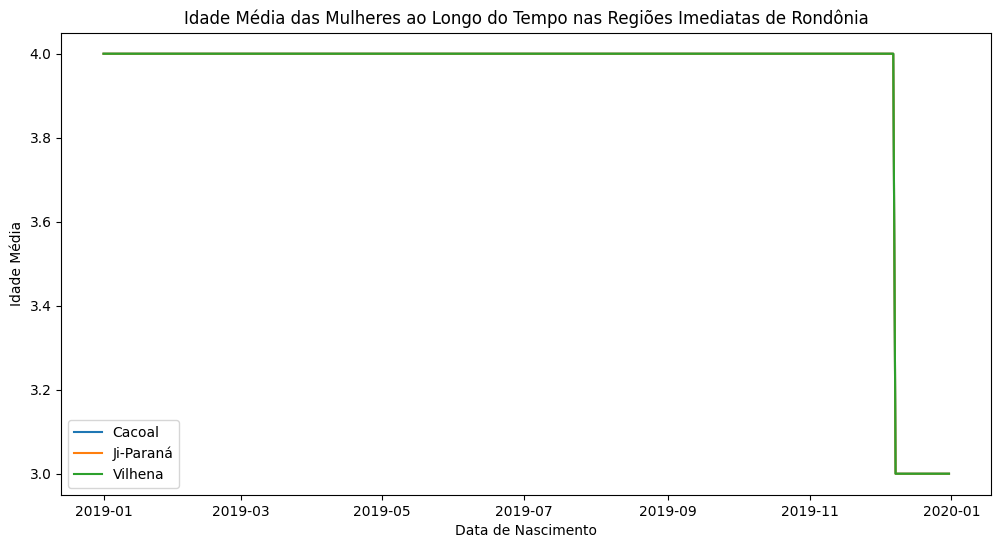

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

# Selecionar colunas relevantes
sinasc_2 = sinasc_raw[['ESCMAE', 'IDADEMAE', 'munResNome']].copy()  # Crie uma cópia para evitar o aviso

# Mapeamento dos níveis de escolaridade
mapeamento = {
    'Nenhuma': 'A - Nenhuma',
    '8 a 11 anos': 'D - 8 a 11 anos',
    '1 a 3 anos': 'B - 1 a 3 anos',
    '12 anos ou mais': 'E - 12 anos ou mais',
    '4 a 7 anos': 'C - 4 a 7 anos'
}
sinasc_2['ESCMAE'] = sinasc_2['ESCMAE'].map(mapeamento)

# Definir mapeamento das regiões
regiao_geografica_imediata = {
    'Alvorada d\'Oeste': 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',

    'Alta Floresta d\'Oeste': 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    'Espigão d\'Oeste': 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    'Nova Brasilândia d\'Oeste': 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    'Santa Luzia d\'Oeste': 'Cacoal',
    'São Felipe d\'Oeste': 'Cacoal',

    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena'
}
sinasc_2['Região'] = sinasc_2['munResNome'].map(regiao_geografica_imediata)

# Converter data de nascimento para formato datetime
sinasc_2['DataNascimento'] = pd.to_datetime(sinasc_raw['DTNASC']).copy()

# Calcular a idade das mães
sinasc_2['Idade'] = (pd.to_datetime('today') - sinasc_2['DataNascimento']).astype('<m8[Y]')

# Agrupar por região e calcular idade média
idade_media_por_regiao = sinasc_2.groupby(['Região', 'DataNascimento']).mean()['Idade'].reset_index()

# Plotar os dados
plt.figure(figsize=(12, 6))
for regiao in idade_media_por_regiao['Região'].unique():
    dados = idade_media_por_regiao[idade_media_por_regiao['Região'] == regiao]
    plt.plot(dados['DataNascimento'], dados['Idade'], label=regiao)

plt.title('Idade Média das Mulheres ao Longo do Tempo nas Regiões Imediatas de Rondônia')
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade Média')
plt.legend()
plt.show()



# 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave

## 5.1 IDH

In [88]:
idh_data = {
    "IDH-M alto": [
        {"Município": "Porto Velho", "IDH-M": 0.736, "Renda": 0.764, "Longevidade": 0.819, "Educação": 0.638},
        {"Município": "Vilhena", "IDH-M": 0.731, "Renda": 0.734, "Longevidade": 0.808, "Educação": 0.659},
        {"Município": "Cacoal", "IDH-M": 0.718, "Renda": 0.727, "Longevidade": 0.821, "Educação": 0.620},
        {"Município": "Ji-Paraná", "IDH-M": 0.714, "Renda": 0.728, "Longevidade": 0.810, "Educação": 0.617},
        {"Município": "Pimenta Bueno", "IDH-M": 0.710, "Renda": 0.726, "Longevidade": 0.803, "Educação": 0.613},
        {"Município": "Ariquemes", "IDH-M": 0.702, "Renda": 0.716, "Longevidade": 0.806, "Educação": 0.600},
        {"Município": "Rolim de Moura", "IDH-M": 0.700, "Renda": 0.709, "Longevidade": 0.808, "Educação": 0.598}
    ],
    "IDH-M médio": [
        {"Município": "Cerejeiras", "IDH-M": 0.692, "Renda": 0.688, "Longevidade": 0.799, "Educação": 0.602},
        {"Município": "Jaru", "IDH-M": 0.689, "Renda": 0.687, "Longevidade": 0.825, "Educação": 0.577},
        {"Município": "Colorado do Oeste", "IDH-M": 0.685, "Renda": 0.676, "Longevidade": 0.814, "Educação": 0.584},
        {"Município": "Ouro Preto do Oeste", "IDH-M": 0.682, "Renda": 0.687, "Longevidade": 0.812, "Educação": 0.569},
        {"Município": "Espigão d'Oeste", "IDH-M": 0.672, "Renda": 0.691, "Longevidade": 0.819, "Educação": 0.536},
        {"Município": "Santa Luzia d'Oeste", "IDH-M": 0.670, "Renda": 0.657, "Longevidade": 0.812, "Educação": 0.564},
        {"Município": "Pimenteiras do Oeste", "IDH-M": 0.665, "Renda": 0.662, "Longevidade": 0.816, "Educação": 0.545},
        {"Município": "Presidente Médici", "IDH-M": 0.664, "Renda": 0.671, "Longevidade": 0.792, "Educação": 0.550},
        {"Município": "Castanheiras", "IDH-M": 0.658, "Renda": 0.650, "Longevidade": 0.803, "Educação": 0.547},
        {"Município": "Guajará-Mirim", "IDH-M": 0.657, "Renda": 0.663, "Longevidade": 0.823, "Educação": 0.519},
        {"Município": "Chupinguaia", "IDH-M": 0.652, "Renda": 0.659, "Longevidade": 0.820, "Educação": 0.514},
        {"Município": "Cabixi", "IDH-M": 0.650, "Renda": 0.650, "Longevidade": 0.757, "Educação": 0.559},
        {"Município": "Candeias do Jamari", "IDH-M": 0.649, "Renda": 0.652, "Longevidade": 0.819, "Educação": 0.512},
        {"Município": "São Felipe d'Oeste", "IDH-M": 0.649, "Renda": 0.615, "Longevidade": 0.780, "Educação": 0.571},
        {"Município": "Cacaulândia", "IDH-M": 0.646, "Renda": 0.664, "Longevidade": 0.801, "Educação": 0.506},
        {"Município": "São Miguel do Guaporé", "IDH-M": 0.646, "Renda": 0.644, "Longevidade": 0.781, "Educação": 0.537},
        {"Município": "Mirante da Serra", "IDH-M": 0.643, "Renda": 0.673, "Longevidade": 0.800, "Educação": 0.494},
        {"Município": "Alvorada d'Oeste", "IDH-M": 0.643, "Renda": 0.654, "Longevidade": 0.763, "Educação": 0.534},
        {"Município": "Teixeirópolis", "IDH-M": 0.643, "Renda": 0.653, "Longevidade": 0.818, "Educação": 0.498},
        {"Município": "Nova Brasilândia d'Oeste", "IDH-M": 0.643, "Renda": 0.664, "Longevidade": 0.763, "Educação": 0.524},
        {"Município": "Rio Crespo", "IDH-M": 0.643, "Renda": 0.637, "Longevidade": 0.813, "Educação": 0.513},
        {"Município": "Primavera de Rondônia", "IDH-M": 0.641, "Renda": 0.645, "Longevidade": 0.799, "Educação": 0.512},
        {"Município": "Alta Floresta d'Oeste", "IDH-M": 0.641, "Renda": 0.657, "Longevidade": 0.763, "Educação": 0.526},
        {"Município": "Ministro Andreazza", "IDH-M": 0.638, "Renda": 0.647, "Longevidade": 0.776, "Educação": 0.518},
        {"Município": "Novo Horizonte do Oeste", "IDH-M": 0.634, "Renda": 0.606, "Longevidade": 0.799, "Educação": 0.527},
        {"Município": "Vale do Paraíso", "IDH-M": 0.627, "Renda": 0.641, "Longevidade": 0.792, "Educação": 0.485},
        {"Município": "Alto Paraíso", "IDH-M": 0.625, "Renda": 0.664, "Longevidade": 0.804, "Educação": 0.457},
        {"Município": "Parecis", "IDH-M": 0.617, "Renda": 0.604, "Longevidade": 0.800, "Educação": 0.485},
        {"Município": "Buritis", "IDH-M": 0.616, "Renda": 0.650, "Longevidade": 0.751, "Educação": 0.479},
        {"Município": "Itapuã do Oeste", "IDH-M": 0.614, "Renda": 0.633, "Longevidade": 0.751, "Educação": 0.488},
        {"Município": "Corumbiara", "IDH-M": 0.613, "Renda": 0.630, "Longevidade": 0.774, "Educação": 0.473},
        {"Município": "Cujubim", "IDH-M": 0.612, "Renda": 0.663, "Longevidade": 0.789, "Educação": 0.439},
        {"Município": "Costa Marques", "IDH-M": 0.611, "Renda": 0.616, "Longevidade": 0.751, "Educação": 0.493},
        {"Município": "São Francisco do Guaporé", "IDH-M": 0.611, "Renda": 0.657, "Longevidade": 0.751, "Educação": 0.462},
        {"Município": "Urupá", "IDH-M": 0.609, "Renda": 0.621, "Longevidade": 0.772, "Educação": 0.471},
        {"Município": "Monte Negro", "IDH-M": 0.607, "Renda": 0.645, "Longevidade": 0.762, "Educação": 0.454}
    ],
    "IDH-M baixo": [
        {"Município": "Seringueiras", "IDH-M": 0.598, "Renda": 0.644, "Longevidade": 0.779, "Educação": 0.427},
        {"Município": "Governador Jorge Teixeira", "IDH-M": 0.596, "Renda": 0.627, "Longevidade": 0.762, "Educação": 0.444},
        {"Município": "Machadinho d'Oeste", "IDH-M": 0.596, "Renda": 0.629, "Longevidade": 0.755, "Educação": 0.446},
        {"Município": "Campo Novo de Rondônia", "IDH-M": 0.593, "Renda": 0.667, "Longevidade": 0.772, "Educação": 0.404},
        {"Município": "Alto Alegre dos Parecis", "IDH-M": 0.592, "Renda": 0.603, "Longevidade": 0.777, "Educação": 0.443},
        {"Município": "Theobroma", "IDH-M": 0.589, "Renda": 0.622, "Longevidade": 0.757, "Educação": 0.434},
        {"Município": "Nova União", "IDH-M": 0.587, "Renda": 0.608, "Longevidade": 0.753, "Educação": 0.442},
        {"Município": "Nova Mamoré", "IDH-M": 0.587, "Renda": 0.619, "Longevidade": 0.769, "Educação": 0.424},
        {"Município": "Vale do Anari", "IDH-M": 0.584, "Renda": 0.626, "Longevidade": 0.756, "Educação": 0.421}
    ]

}

In [89]:
# Adicionando faixas ao dicionário
idh_faixas = {
    "IDH-M muito baixo": {"min": 0, "max": 0.499},
    "IDH-M baixo": {"min": 0.5, "max": 0.599},
    "IDH-M médio": {"min": 0.6, "max": 0.699},
    "IDH-M alto": {"min": 0.7, "max": 0.799},
    "IDH-M muito alto": {"min": 0.8, "max": 1.0},
}

# Função para atribuir faixa com base no IDH-M
def atribuir_faixa(idh):
    for faixa, limites in idh_faixas.items():
        if limites["min"] <= idh <= limites["max"]:
            return faixa

# Adicionando uma nova chave 'Faixa' para cada município no dicionário existente
for faixa, municipios in idh_data.items():
    for municipio in municipios:
        idh = municipio["IDH-M"]
        municipio["Faixa"] = atribuir_faixa(idh)

# Corrigindo o KeyError
agrupados_por_faixa = {}
for faixa in idh_faixas.keys():
    if faixa in idh_data:
        agrupados_por_faixa[faixa] = [municipio["Município"] for municipio in idh_data[faixa]]

# Exibindo os municípios agrupados por faixa
for faixa, municipios in agrupados_por_faixa.items():
    print(f"\nFaixa: {faixa}")
    print(", ".join(municipios))



Faixa: IDH-M baixo
Seringueiras, Governador Jorge Teixeira, Machadinho d'Oeste, Campo Novo de Rondônia, Alto Alegre dos Parecis, Theobroma, Nova União, Nova Mamoré, Vale do Anari

Faixa: IDH-M médio
Cerejeiras, Jaru, Colorado do Oeste, Ouro Preto do Oeste, Espigão d'Oeste, Santa Luzia d'Oeste, Pimenteiras do Oeste, Presidente Médici, Castanheiras, Guajará-Mirim, Chupinguaia, Cabixi, Candeias do Jamari, São Felipe d'Oeste, Cacaulândia, São Miguel do Guaporé, Mirante da Serra, Alvorada d'Oeste, Teixeirópolis, Nova Brasilândia d'Oeste, Rio Crespo, Primavera de Rondônia, Alta Floresta d'Oeste, Ministro Andreazza, Novo Horizonte do Oeste, Vale do Paraíso, Alto Paraíso, Parecis, Buritis, Itapuã do Oeste, Corumbiara, Cujubim, Costa Marques, São Francisco do Guaporé, Urupá, Monte Negro

Faixa: IDH-M alto
Porto Velho, Vilhena, Cacoal, Ji-Paraná, Pimenta Bueno, Ariquemes, Rolim de Moura


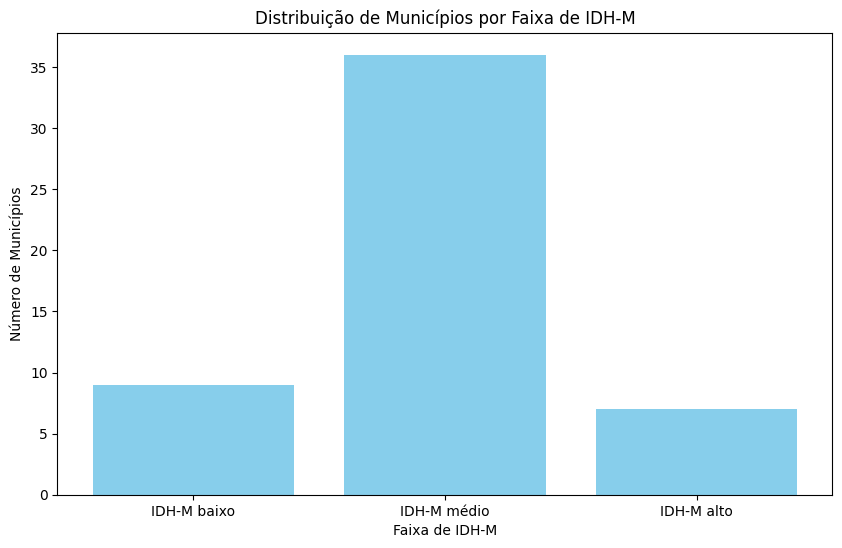

In [90]:
import matplotlib.pyplot as plt

# Criando um dicionário para contar o número de municípios em cada faixa
contagem_por_faixa = {faixa: len(municipios) for faixa, municipios in agrupados_por_faixa.items()}

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_por_faixa.keys(), contagem_por_faixa.values(), color='skyblue')
plt.title('Distribuição de Municípios por Faixa de IDH-M')
plt.xlabel('Faixa de IDH-M')
plt.ylabel('Número de Municípios')
plt.show()


# 5.2 IFDM

In [95]:
# Dicionário IFDM
ifdm_data = {
    "Município": [
        "Porto Velho", "Vilhena", "Cacoal", "Ji-Paraná", "Pimenta Bueno", "Ariquemes", "Rolim de Moura",
        "Cerejeiras", "Jaru", "Colorado do Oeste", "Ouro Preto do Oeste", "Espigão d'Oeste", "Santa Luzia d'Oeste",
        "Pimenteiras do Oeste", "Presidente Médici", "Castanheiras", "Guajará-Mirim", "Chupinguaia", "Candeias do Jamari",
        "São Felipe d'Oeste", "Cacaulândia", "São Miguel do Guaporé", "Mirante da Serra", "Alvorada d'Oeste", "Teixeirópolis",
        "Nova Brasilândia d'Oeste", "Rio Crespo", "Primavera de Rondônia", "Alta Floresta d'Oeste", "Ministro Andreazza",
        "Novo Horizonte do Oeste", "Vale do Paraíso", "Alto Paraíso", "Parecis", "Buritis", "Itapuã do Oeste", "Corumbiara",
        "Cujubim", "Costa Marques", "São Francisco do Guaporé", "Urupá", "Monte Negro", "Seringueiras", "Governador Jorge Teixeira",
        "Machadinho d'Oeste", "Campo Novo de Rondônia", "Nova Mamoré", "Vale do Anari"
    ],
    "IFDM": [
        0.787, 0.774, 0.768, 0.765, 0.760, 0.757, 0.744, 0.743, 0.742, 0.741, 0.739, 0.734, 0.733, 0.723, 0.722, 0.722,
        0.716, 0.716, 0.711, 0.709, 0.703, 0.701, 0.701, 0.698, 0.696, 0.694, 0.693, 0.692, 0.689, 0.688, 0.687, 0.687,
        0.686, 0.685, 0.682, 0.681, 0.680, 0.679, 0.678, 0.677, 0.670, 0.669, 0.664, 0.664, 0.663, 0.654, 0.650, 0.647,
        0.644, 0.636, 0.633, 0.629, 0.613
    ]
}

# Adicionando faixas ao dicionário
ifdm_faixas = {
    "IFDM muito baixo": {"min": 0, "max": 0.499},
    "IFDM baixo": {"min": 0.5, "max": 0.599},
    "IFDM médio": {"min": 0.6, "max": 0.699},
    "IFDM alto": {"min": 0.7, "max": 0.799},
    "IFDM muito alto": {"min": 0.8, "max": 1.0},
}

# Função para atribuir faixa com base no IFDM
def atribuir_faixa(ifdm):
    for faixa, limites in ifdm_faixas.items():
        if limites["min"] <= ifdm <= limites["max"]:
            return faixa

# Adicionando uma nova chave 'Faixa_IFDM' para cada município no dicionário existente
ifdm_data["Faixa_IFDM"] = [atribuir_faixa(ifdm) for ifdm in ifdm_data["IFDM"]]

# Corrigindo o KeyError
agrupados_por_faixa_ifdm = {}
for faixa in ifdm_faixas.keys():
    agrupados_por_faixa_ifdm[faixa] = [municipio for municipio, faixa_ifdm in zip(ifdm_data["Município"], ifdm_data["Faixa_IFDM"]) if faixa_ifdm == faixa]

# Exibindo os municípios agrupados por faixa IFDM
for faixa, municipios in agrupados_por_faixa_ifdm.items():
    print(f"\nFaixa IFDM: {faixa}")
    if municipios:
        print(", ".join(municipios))
    else:
        print("Nenhum município nesta faixa.")




Faixa IFDM: IFDM muito baixo
Nenhum município nesta faixa.

Faixa IFDM: IFDM baixo
Nenhum município nesta faixa.

Faixa IFDM: IFDM médio
Alvorada d'Oeste, Teixeirópolis, Nova Brasilândia d'Oeste, Rio Crespo, Primavera de Rondônia, Alta Floresta d'Oeste, Ministro Andreazza, Novo Horizonte do Oeste, Vale do Paraíso, Alto Paraíso, Parecis, Buritis, Itapuã do Oeste, Corumbiara, Cujubim, Costa Marques, São Francisco do Guaporé, Urupá, Monte Negro, Seringueiras, Governador Jorge Teixeira, Machadinho d'Oeste, Campo Novo de Rondônia, Nova Mamoré, Vale do Anari

Faixa IFDM: IFDM alto
Porto Velho, Vilhena, Cacoal, Ji-Paraná, Pimenta Bueno, Ariquemes, Rolim de Moura, Cerejeiras, Jaru, Colorado do Oeste, Ouro Preto do Oeste, Espigão d'Oeste, Santa Luzia d'Oeste, Pimenteiras do Oeste, Presidente Médici, Castanheiras, Guajará-Mirim, Chupinguaia, Candeias do Jamari, São Felipe d'Oeste, Cacaulândia, São Miguel do Guaporé, Mirante da Serra

Faixa IFDM: IFDM muito alto
Nenhum município nesta faixa.



Faixa IFDM: IFDM muito baixo
Nenhum município nesta faixa.

Faixa IFDM: IFDM baixo
Nenhum município nesta faixa.

Faixa IFDM: IFDM médio
Alvorada d'Oeste, Teixeirópolis, Nova Brasilândia d'Oeste, Rio Crespo, Primavera de Rondônia, Alta Floresta d'Oeste, Ministro Andreazza, Novo Horizonte do Oeste, Vale do Paraíso, Alto Paraíso, Parecis, Buritis, Itapuã do Oeste, Corumbiara, Cujubim, Costa Marques, São Francisco do Guaporé, Urupá, Monte Negro, Seringueiras, Governador Jorge Teixeira, Machadinho d'Oeste, Campo Novo de Rondônia, Nova Mamoré, Vale do Anari

Faixa IFDM: IFDM alto
Porto Velho, Vilhena, Cacoal, Ji-Paraná, Pimenta Bueno, Ariquemes, Rolim de Moura, Cerejeiras, Jaru, Colorado do Oeste, Ouro Preto do Oeste, Espigão d'Oeste, Santa Luzia d'Oeste, Pimenteiras do Oeste, Presidente Médici, Castanheiras, Guajará-Mirim, Chupinguaia, Candeias do Jamari, São Felipe d'Oeste, Cacaulândia, São Miguel do Guaporé, Mirante da Serra

Faixa IFDM: IFDM muito alto
Nenhum município nesta faixa.


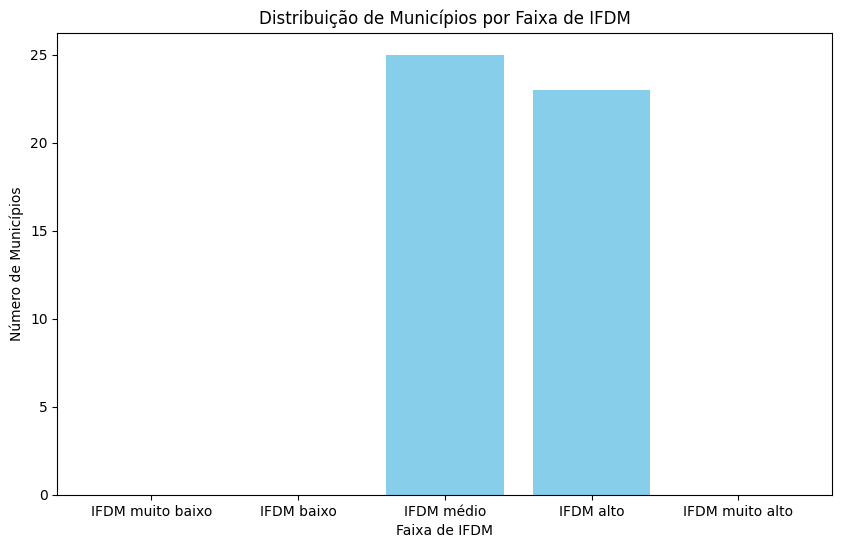

In [96]:
import matplotlib.pyplot as plt

# Dicionário IFDM
ifdm_data = {
    "Município": [
        "Porto Velho", "Vilhena", "Cacoal", "Ji-Paraná", "Pimenta Bueno", "Ariquemes", "Rolim de Moura",
        "Cerejeiras", "Jaru", "Colorado do Oeste", "Ouro Preto do Oeste", "Espigão d'Oeste", "Santa Luzia d'Oeste",
        "Pimenteiras do Oeste", "Presidente Médici", "Castanheiras", "Guajará-Mirim", "Chupinguaia", "Candeias do Jamari",
        "São Felipe d'Oeste", "Cacaulândia", "São Miguel do Guaporé", "Mirante da Serra", "Alvorada d'Oeste", "Teixeirópolis",
        "Nova Brasilândia d'Oeste", "Rio Crespo", "Primavera de Rondônia", "Alta Floresta d'Oeste", "Ministro Andreazza",
        "Novo Horizonte do Oeste", "Vale do Paraíso", "Alto Paraíso", "Parecis", "Buritis", "Itapuã do Oeste", "Corumbiara",
        "Cujubim", "Costa Marques", "São Francisco do Guaporé", "Urupá", "Monte Negro", "Seringueiras", "Governador Jorge Teixeira",
        "Machadinho d'Oeste", "Campo Novo de Rondônia", "Nova Mamoré", "Vale do Anari"
    ],
    "IFDM": [
        0.787, 0.774, 0.768, 0.765, 0.760, 0.757, 0.744, 0.743, 0.742, 0.741, 0.739, 0.734, 0.733, 0.723, 0.722, 0.722,
        0.716, 0.716, 0.711, 0.709, 0.703, 0.701, 0.701, 0.698, 0.696, 0.694, 0.693, 0.692, 0.689, 0.688, 0.687, 0.687,
        0.686, 0.685, 0.682, 0.681, 0.680, 0.679, 0.678, 0.677, 0.670, 0.669, 0.664, 0.664, 0.663, 0.654, 0.650, 0.647,
        0.644, 0.636, 0.633, 0.629, 0.613
    ]
}

# Adicionando faixas ao dicionário
ifdm_faixas = {
    "IFDM muito baixo": {"min": 0, "max": 0.499},
    "IFDM baixo": {"min": 0.5, "max": 0.599},
    "IFDM médio": {"min": 0.6, "max": 0.699},
    "IFDM alto": {"min": 0.7, "max": 0.799},
    "IFDM muito alto": {"min": 0.8, "max": 1.0},
}

# Função para atribuir faixa com base no IFDM
def atribuir_faixa(ifdm):
    for faixa, limites in ifdm_faixas.items():
        if limites["min"] <= ifdm <= limites["max"]:
            return faixa

# Adicionando uma nova chave 'Faixa_IFDM' para cada município no dicionário existente
ifdm_data["Faixa_IFDM"] = [atribuir_faixa(ifdm) for ifdm in ifdm_data["IFDM"]]

# Corrigindo o KeyError
agrupados_por_faixa_ifdm = {}
for faixa in ifdm_faixas.keys():
    agrupados_por_faixa_ifdm[faixa] = [municipio for municipio, faixa_ifdm in zip(ifdm_data["Município"], ifdm_data["Faixa_IFDM"]) if faixa_ifdm == faixa]

# Exibindo os municípios agrupados por faixa IFDM
for faixa, municipios in agrupados_por_faixa_ifdm.items():
    print(f"\nFaixa IFDM: {faixa}")
    if municipios:
        print(", ".join(municipios))
    else:
        print("Nenhum município nesta faixa.")

# Criando um dicionário para contar o número de municípios em cada faixa IFDM
contagem_por_faixa_ifdm = {faixa: len(municipios) for faixa, municipios in agrupados_por_faixa_ifdm.items()}

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_por_faixa_ifdm.keys(), contagem_por_faixa_ifdm.values(), color='skyblue')
plt.title('Distribuição de Municípios por Faixa de IFDM')
plt.xlabel('Faixa de IFDM')
plt.ylabel('Número de Municípios')
plt.show()


# 5.3 PIB


Faixa PIB: Acima de 1 Bilhão
Porto Velho, Ji-Paraná, Vilhena, Ariquemes, Cacoal, Jaru, Rolim de Moura, Pimenta Bueno

Faixa PIB: Acima de 500 Milhões
Guajará-Mirim, Ouro Preto do Oeste, Buritis, Machadinho do Oeste, Espigão d'Oeste, São Miguel do Guaporé, Candeias do Jamari, Nova Mamoré, Cerejeiras

Faixa PIB: Acima de 300 Milhões
Alta Floresta do Oeste, Presidente Médici, Cujubim, Nova Brasilândia do Oeste, Alto Paraíso, São Francisco do Guaporé, Colorado do Oeste

Faixa PIB: Acima de 200 Milhões
Monte Negro, Alto Alegre dos Parecis, Campo Novo de Rondônia, Alvorada do Oeste

Faixa PIB: Acima de 100 Milhões
Chupinguaia, Corumbiara, Ministro Andreazza, Urupá, Costa Marques, Seringueiras, Mirante da Serra, Governador Jorge Teixeira, Theobroma, Santa Luzia do Oeste, Novo Horizonte do Oeste, Itapuã do Oeste, Vale do Paraíso, Cacaulândia, Cabixi, Vale do Anari

Faixa PIB: Até 100 Milhões
Nova União, Parecis, Rio Crespo, Pimenteiras do Oeste, Teixeirópolis, São Felipe do Oeste, Castanheira

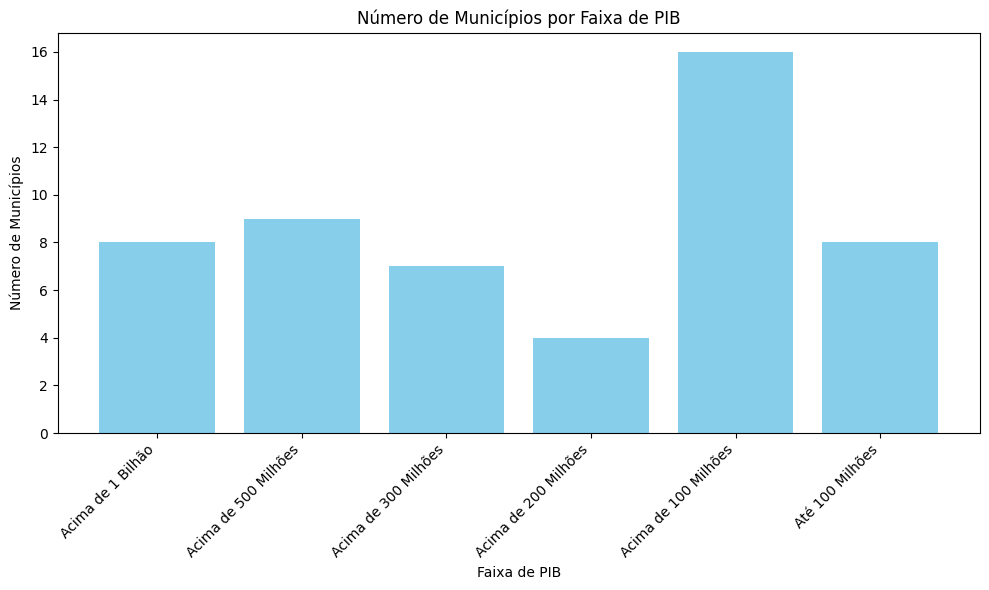

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados do PIB
pib_data = {
    "Acima de 1 Bilhão": [
        {"Posição": 1, "Município": "Porto Velho", "PIB": 17912070, "Alteração": "Aumento"},
        {"Posição": 2, "Município": "Ji-Paraná", "PIB": 3783972, "Alteração": "Aumento"},
        {"Posição": 3, "Município": "Vilhena", "PIB": 2831175, "Alteração": "Aumento"},
        {"Posição": 4, "Município": "Ariquemes", "PIB": 2579830, "Alteração": "Aumento"},
        {"Posição": 5, "Município": "Cacoal", "PIB": 2261644, "Alteração": "Aumento"},
        {"Posição": 6, "Município": "Jaru", "PIB": 1500890, "Alteração": "Aumento"},
        {"Posição": 7, "Município": "Rolim de Moura", "PIB": 1283434, "Alteração": "Aumento"},
        {"Posição": 8, "Município": "Pimenta Bueno", "PIB": 1164877, "Alteração": "Aumento"}
    ],
    "Acima de 500 Milhões": [
        {"Posição": 9, "Município": "Guajará-Mirim", "PIB": 893000, "Alteração": "Aumento"},
        {"Posição": 10, "Município": "Ouro Preto do Oeste", "PIB": 834000, "Alteração": "Aumento"},
        {"Posição": 11, "Município": "Buritis", "PIB": 726000, "Alteração": "Aumento"},
        {"Posição": 12, "Município": "Machadinho do Oeste", "PIB": 633000, "Alteração": "Aumento"},
        {"Posição": 13, "Município": "Espigão d'Oeste", "PIB": 625000, "Alteração": "Aumento"},
        {"Posição": 14, "Município": "São Miguel do Guaporé", "PIB": 616000, "Alteração": "Aumento"},
        {"Posição": 15, "Município": "Candeias do Jamari", "PIB": 548000, "Alteração": "Aumento"},
        {"Posição": 16, "Município": "Nova Mamoré", "PIB": 529000, "Alteração": "Aumento"},
        {"Posição": 17, "Município": "Cerejeiras", "PIB": 507000, "Alteração": "Aumento"}
    ],
    "Acima de 300 Milhões": [
        {"Posição": 18, "Município": "Alta Floresta do Oeste", "PIB": 496000, "Alteração": "Aumento"},
        {"Posição": 19, "Município": "Presidente Médici", "PIB": 428000, "Alteração": "Aumento"},
        {"Posição": 20, "Município": "Cujubim", "PIB": 385000, "Alteração": "Aumento"},
        {"Posição": 21, "Município": "Nova Brasilândia do Oeste", "PIB": 360000, "Alteração": "Aumento"},
        {"Posição": 22, "Município": "Alto Paraíso", "PIB": 358000, "Alteração": "Aumento"},
        {"Posição": 23, "Município": "São Francisco do Guaporé", "PIB": 353000, "Alteração": "Aumento"},
        {"Posição": 24, "Município": "Colorado do Oeste", "PIB": 335000, "Alteração": "Aumento"}
    ],
    "Acima de 200 Milhões": [
        {"Posição": 25, "Município": "Monte Negro", "PIB": 219152, "Alteração": "Aumento"},
        {"Posição": 26, "Município": "Alto Alegre dos Parecis", "PIB": 213410, "Alteração": "Aumento"},
        {"Posição": 27, "Município": "Campo Novo de Rondônia", "PIB": 208821, "Alteração": "Aumento"},
        {"Posição": 28, "Município": "Alvorada do Oeste", "PIB": 204098, "Alteração": "Aumento"}
    ],
    "Acima de 100 Milhões": [
        {"Posição": 29, "Município": "Chupinguaia", "PIB": 190331, "Alteração": "Baixa"},
        {"Posição": 30, "Município": "Corumbiara", "PIB": 188218, "Alteração": "Baixa"},
        {"Posição": 31, "Município": "Ministro Andreazza", "PIB": 174633, "Alteração": "Aumento"},
        {"Posição": 32, "Município": "Urupá", "PIB": 172143, "Alteração": "Aumento"},
        {"Posição": 33, "Município": "Costa Marques", "PIB": 171878, "Alteração": "Aumento"},
        {"Posição": 34, "Município": "Seringueiras", "PIB": 169429, "Alteração": "Aumento"},
        {"Posição": 35, "Município": "Mirante da Serra", "PIB": 163955, "Alteração": "Aumento"},
        {"Posição": 36, "Município": "Governador Jorge Teixeira", "PIB": 148027, "Alteração": "Baixa"},
        {"Posição": 37, "Município": "Theobroma", "PIB": 140601, "Alteração": "Aumento"},
        {"Posição": 38, "Município": "Santa Luzia do Oeste", "PIB": 135934, "Alteração": "Baixa"},
        {"Posição": 39, "Município": "Novo Horizonte do Oeste", "PIB": 129399, "Alteração": "Aumento"},
        {"Posição": 40, "Município": "Itapuã do Oeste", "PIB": 129351, "Alteração": "Aumento"},
        {"Posição": 41, "Município": "Vale do Paraíso", "PIB": 116742, "Alteração": "Aumento"},
        {"Posição": 42, "Município": "Cacaulândia", "PIB": 116635, "Alteração": "Aumento"},
        {"Posição": 43, "Município": "Cabixi", "PIB": 113031, "Alteração": "Aumento"},
        {"Posição": 44, "Município": "Vale do Anari", "PIB": 105208, "Alteração": "Aumento"}
    ],
    "Até 100 Milhões": [
        {"Posição": 45, "Município": "Nova União", "PIB": 92346, "Alteração": "Aumento"},
        {"Posição": 46, "Município": "Parecis", "PIB": 80759, "Alteração": "Aumento"},
        {"Posição": 47, "Município": "Rio Crespo", "PIB": 76854, "Alteração": "Baixa"},
        {"Posição": 48, "Município": "Pimenteiras do Oeste", "PIB": 76756, "Alteração": "Aumento"},
        {"Posição": 49, "Município": "Teixeirópolis", "PIB": 72089, "Alteração": "Aumento"},
        {"Posição": 50, "Município": "São Felipe do Oeste", "PIB": 72084, "Alteração": "Baixa"},
        {"Posição": 51, "Município": "Castanheiras", "PIB": 59779, "Alteração": "Aumento"},
        {"Posição": 52, "Município": "Primavera de Rondônia", "PIB": 52908, "Alteração": "Aumento"}
    ]
}

# Mapeamento para criar faixas
pib_faixas_mapping = {
    "Acima de 1 Bilhão": {"min": 1e9, "max": float('inf')},
    "Acima de 500 Milhões": {"min": 5e8, "max": 1e9},
    "Acima de 300 Milhões": {"min": 3e8, "max": 5e8},
    "Acima de 200 Milhões": {"min": 2e8, "max": 3e8},
    "Acima de 100 Milhões": {"min": 1e8, "max": 2e8},
    "Até 100 Milhões": {"min": 0, "max": 1e8}
}

# Adicionar faixas ao dicionário
for faixa, limites in pib_faixas_mapping.items():
    for munic in pib_data[faixa]:
        if limites["min"] <= munic["PIB"] < limites["max"]:
            munic["Faixa_PIB"] = faixa

# Agrupar por faixa
agrupados_por_faixa_pib = {}
for faixa in pib_faixas_mapping.keys():
    agrupados_por_faixa_pib[faixa] = [munic["Município"] for munic in pib_data[faixa]]

# Exibir os municípios agrupados por faixa PIB
for faixa, municipios in agrupados_por_faixa_pib.items():
    print(f"\nFaixa PIB: {faixa}")
    print(", ".join(municipios))

faixas = list(agrupados_por_faixa_pib.keys())
num_municipios = [len(municipios) for municipios in agrupados_por_faixa_pib.values()]

plt.figure(figsize=(10, 6))
plt.bar(faixas, num_municipios, color='skyblue')
plt.title('Número de Municípios por Faixa de PIB')
plt.xlabel('Faixa de PIB')
plt.ylabel('Número de Municípios')
plt.xticks(rotation=45, ha="right")  # Ajuste para rotacionar os rótulos do eixo x
plt.tight_layout()  # Ajuste automático do layout para evitar sobreposições
plt.show()


# Entrelaçando Desenvolvimento Humano e Características Maternas: Uma Análise Abrangente das Dinâmicas Regionais e Geográficas

## Introdução

Explorando dados do SINASC e IDH, analisamos como o desenvolvimento humano se conecta às características maternas. Descobrimos padrões na idade das mães e sua relação com fatores geográficos, oferecendo insights simples e valiosos sobre saúde materna e desenvolvimento socioeconômico.

## Relação entre Desenvolvimento Humano e Características Maternas:
Ao analisar a distribuição de municípios por faixa de IDH-M, observamos disparidades regionais no desenvolvimento humano. Podemos explorar como essas diferenças se refletem nas características maternas, como a idade média das mulheres ao longo do tempo.

## Idade Média das Mulheres e Desenvolvimento Humano:
Ao analisar a idade média das mulheres ao longo do tempo nas diferentes regiões, podemos identificar padrões temporais e como essas tendências se relacionam com o nível de desenvolvimento humano.

## Correlação Potencial com IDH-M:
Examinar a possível correlação entre a idade média das mães e o IDH-M das regiões. Podemos investigar se regiões com IDH-M mais alto apresentam características maternas diferentes em comparação com regiões de IDH-M mais baixo.

## Influência de Fatores Geográficos nas Características Maternas:
Ao analisar as faixas de latitude, área dos municípios e altitude, podemos identificar como esses fatores geográficos podem influenciar as características maternas.

## Latitude e Características Maternas:
Observamos que regiões com latitude acima de -10.5 têm uma média de idade das mães superior, enquanto a quantidade média de filhos vivos é inferior. Isso sugere uma possível relação entre latitude e características maternas.

## Área dos Municípios e Escolaridade da Mãe:
Municípios com áreas acima de 3000 têm uma escolaridade média da mãe superior. Essa informação pode ser crucial para direcionar políticas públicas visando melhorar a educação materna em áreas mais extensas.

## Altitude e Variáveis Neonatais:
Não encontramos uma tendência clara na variação de índices neonatais com base na faixa de altitude, indicando que fatores geográficos específicos podem não ter uma influência significativa nessas variáveis.

## Relacionamento entre Escolaridade da Mãe e Idade dos Pais:
Ao agrupar os dados pela escolaridade da mãe e calcular a soma das idades da mãe e do pai, podemos explorar como a educação materna se relaciona com as idades médias dos pais.

## Escolaridade da Mãe e Idades dos Pais:
Investigar como a escolaridade da mãe está relacionada com as idades médias da mãe e do pai pode fornecer insights sobre padrões educacionais e demográficos.